<a href="https://colab.research.google.com/github/rohitsubodh/project1/blob/main/harsh_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
import missingno as mg
 
df1 = pd.read_excel('/content/Sample_BOOKINGS_Dataset_1.xlsx')

In [ ]:
df2 = pd.read_excel('/content/Sample_CUSTOMER_Dataset_2.xlsx')
df2

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,M,32,google,2020-09-01
...,...,...,...,...,...,...,...
98349,5015433432050,Datta,Mumbai,NaN,18,web,2020-11-30
98350,5015433432051,Kumud Sharma,Delhi NCR,NaN,36,android,2020-11-30
98351,5015433432052,Pramod,Kolhapur,NaN,78,google,2020-11-30
98352,5015433432053,Tanzeem Ahmed,Bengaluru,NaN,28,android,2020-11-30


In [ ]:
df = pd.merge(df2,df1,on='cust_id')  #merging of two dataframe df1 and df2
df

,cust_id,name,city,gender,AGE,medium_x,signup_date,date,medium_y,restaurant_name,location
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon"
1,5015431352115,Rija,Kolkata,F,60,google,2020-09-01,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata"
2,5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon"
3,5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad"
4,5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru"
...,...,...,...,...,...,...,...,...,...,...,...
61328,5015433432040,Adithya,Hyderabad,NaN,38,google,2020-11-30,2020-12-01,google,Deccan Pavilion,ITC Kakatiya
61329,5015433432043,Mazia,Mumbai,NaN,26,google,2020-11-30,2020-12-01,google,Barbeque Nation,"Hill Road, Bandra West, Western Suburbs"
61330,5015433432044,Salik,Jaipur,NaN,31,web,2020-11-30,2020-12-04,web,Barbeque Nation,"MI Road, Jaipur"
61331,5015433432050,Datta,Mumbai,NaN,18,web,2020-11-30,2020-12-11,web,Lake View Cafe,"Renaissance Mumbai Convention Centre & Hotel, ..."


In [ ]:
df.info

<bound method DataFrame.info of              cust_id  ...                                           location
0      5015431352112  ...                        The Leela Ambience, Gurgaon
1      5015431352115  ...                          Park Street Area, Kolkata
2      5015431352121  ...                             Ambience Mall, Gurgaon
3      5015431352122  ...                             Hitech City, Hyderabad
4      5015431352123  ...                      Kalyan Nagar, North Bengaluru
...              ...  ...                                                ...
61328  5015433432040  ...                                       ITC Kakatiya
61329  5015433432043  ...            Hill Road, Bandra West, Western Suburbs
61330  5015433432044  ...                                    MI Road, Jaipur
61331  5015433432050  ...  Renaissance Mumbai Convention Centre & Hotel, ...
61332  5015433432052  ...                                           Kolhapur

[61333 rows x 11 columns]>

In [ ]:
#Missing values in merged 
df.isnull().sum()

cust_id                0
name                  38
city                   0
gender             58353
AGE                    0
medium_x               0
signup_date            0
date                   0
medium_y               0
restaurant_name        0
location               0
dtype: int64

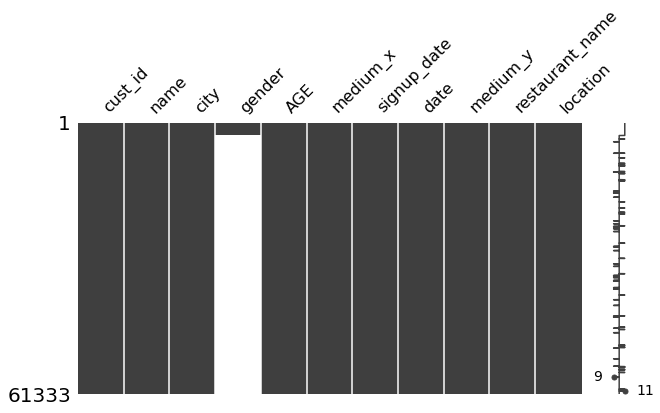

In [ ]:
#Visulaising total number of missing values in each column of merged
mg.matrix(df,figsize=(10,5))

In [ ]:
#finding difference in signup date and joining date
df['signup_date']=[int(i.days) for i in (df['date']-df['signup_date'])]
df['date']=df.signup_date

In [ ]:
# df['date']=df.signup_date
df

,cust_id,name,city,gender,AGE,medium_x,signup_date,date,medium_y,restaurant_name,location
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,3,3,web,Spectra,"The Leela Ambience, Gurgaon"
1,5015431352115,Rija,Kolkata,F,60,google,5,5,google,Barbeque Nation,"Park Street Area, Kolkata"
2,5015431352121,Aparna,Delhi NCR,F,27,google,0,0,google,Barbeque Nation,"Ambience Mall, Gurgaon"
3,5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,3,3,google,Barbeque Pride,"Hitech City, Hyderabad"
4,5015431352123,Vaseem,Bengaluru,M,38,google,5,5,google,Float Brewery,"Kalyan Nagar, North Bengaluru"
...,...,...,...,...,...,...,...,...,...,...,...
61328,5015433432040,Adithya,Hyderabad,NaN,38,google,1,1,google,Deccan Pavilion,ITC Kakatiya
61329,5015433432043,Mazia,Mumbai,NaN,26,google,1,1,google,Barbeque Nation,"Hill Road, Bandra West, Western Suburbs"
61330,5015433432044,Salik,Jaipur,NaN,31,web,4,4,web,Barbeque Nation,"MI Road, Jaipur"
61331,5015433432050,Datta,Mumbai,NaN,18,web,11,11,web,Lake View Cafe,"Renaissance Mumbai Convention Centre & Hotel, ..."


In [ ]:
df.drop('signup_date',axis=1) #droping signup col

,cust_id,name,city,gender,AGE,medium_x,date,medium_y,restaurant_name,location
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,3,web,Spectra,"The Leela Ambience, Gurgaon"
1,5015431352115,Rija,Kolkata,F,60,google,5,google,Barbeque Nation,"Park Street Area, Kolkata"
2,5015431352121,Aparna,Delhi NCR,F,27,google,0,google,Barbeque Nation,"Ambience Mall, Gurgaon"
3,5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,3,google,Barbeque Pride,"Hitech City, Hyderabad"
4,5015431352123,Vaseem,Bengaluru,M,38,google,5,google,Float Brewery,"Kalyan Nagar, North Bengaluru"
...,...,...,...,...,...,...,...,...,...,...
61328,5015433432040,Adithya,Hyderabad,NaN,38,google,1,google,Deccan Pavilion,ITC Kakatiya
61329,5015433432043,Mazia,Mumbai,NaN,26,google,1,google,Barbeque Nation,"Hill Road, Bandra West, Western Suburbs"
61330,5015433432044,Salik,Jaipur,NaN,31,web,4,web,Barbeque Nation,"MI Road, Jaipur"
61331,5015433432050,Datta,Mumbai,NaN,18,web,11,web,Lake View Cafe,"Renaissance Mumbai Convention Centre & Hotel, ..."


In [ ]:
df['gender'].isna().sum() # counting NULL in gender col

58353

In [ ]:
df = df.replace(np.nan, 'x', regex=True)
df = df.replace('Female', 'F', regex=True)
df = df.replace('Male', 'M', regex=True)

df['gender']

0        F
1        F
2        F
3        M
4        M
        ..
61328    x
61329    x
61330    x
61331    x
61332    x
Name: gender, Length: 61333, dtype: object

In [ ]:
df['gender'].unique()

array(['F', 'M', 'x'], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  ## encoding tool
  
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
  
df['gender'].unique() 

array([0, 1, 2])

In [ ]:
#copy the dataframe df to X
X=df[['city','gender','AGE','date','restaurant_name','location','medium_x']]
X;

In [ ]:
X.city.value_counts(); #counting different number of cities 

In [ ]:
X.medium_x.value_counts();

In [ ]:
X['restaurant_name']=[str(i) for i in (X['restaurant_name'])] ## conversion of object type to string type
X['restaurant_name'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#encoding the resturant name
X['restaurant_name']= label_encoder.fit_transform(X['restaurant_name'])
  
X['restaurant_name'].value_counts();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#encoding the city
X['city']= label_encoder.fit_transform(X['city'])
  
X['city'].value_counts();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
##encoding the medium_x name
X['medium_x']= label_encoder.fit_transform(X['medium_x'])
  
X['medium_x'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3    46789
0     7325
5     3419
4     2544
2     1206
1       50
Name: medium_x, dtype: int64

In [ ]:
# X['location']= label_encoder.fit_transform(X['location'])
  
# X['location'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


175     1802
86      1246
754     1187
493     1117
1205    1037
        ... 
439        1
407        1
808        1
840        1
0          1
Name: location, Length: 1231, dtype: int64

In [ ]:
dt=[]
for i in (X['date']):
  if (i<=7):
    dt.append(0)
  else:
     dt.append(1)
arr=np.array(dt)     
X['date']=arr    
#Allocating 0 where the duration exceeds 7 days  else 1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.head()

,city,gender,AGE,date,restaurant_name,location,medium_x
0,21,0,72,0,1747,1090,5
1,45,0,60,0,224,749,3
2,21,0,27,0,224,42,3
3,33,1,69,0,225,388,3
4,12,1,38,0,705,529,3


In [ ]:

X['date'].value_counts()

0    54688
1     6645
Name: date, dtype: int64

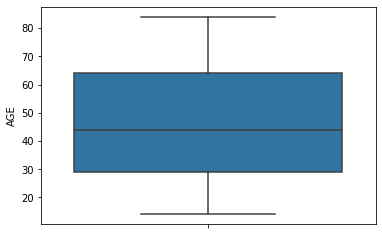

In [ ]:
sns.boxplot(y='AGE', data=X)

In [ ]:
X1=X[['gender','city','AGE','restaurant_name','medium_x',]]
y=X[['date']]

In [ ]:
eignvalues,eignvectors = np.linalg.eig(X1.corr())
pd.Series(eignvalues).sort_values()
#this is use to see the collinearity among parameters

1   0.66
5   0.81
4   0.94
3   1.01
2   1.19
0   1.38
dtype: float64

In [ ]:
corr_matrix=X1.corr() #used to find the corelation matrix
pd.options.display.float_format='{:,.2f}'.format
corr_matrix

,gender,city,AGE,restaurant_name,medium_x,location
gender,1.00,0.03,-0.00,0.02,-0.00,0.01
city,0.03,1.00,0.01,-0.20,0.02,0.29
AGE,-0.00,0.01,1.00,-0.03,0.19,-0.00
restaurant_name,0.02,-0.20,-0.03,1.00,-0.05,-0.04
medium_x,-0.00,0.02,0.19,-0.05,1.00,-0.00
location,0.01,0.29,-0.00,-0.04,-0.00,1.00


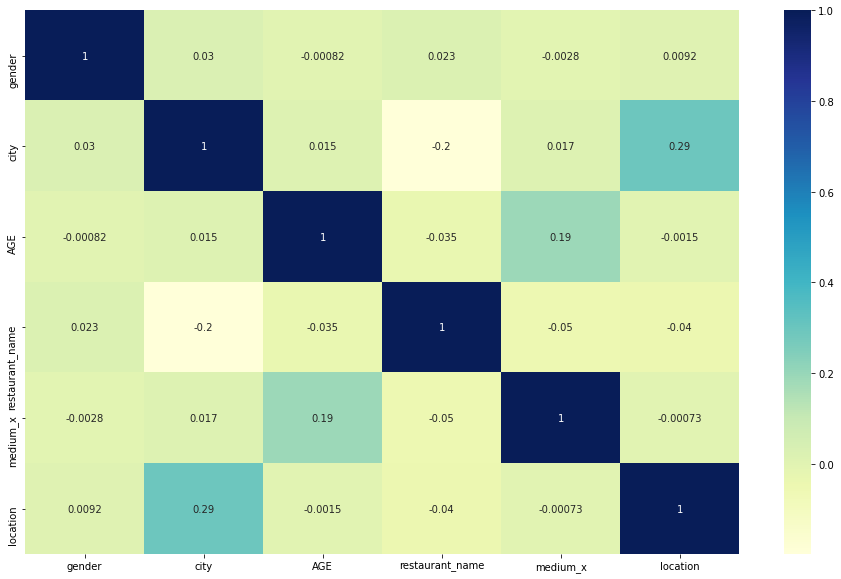

In [ ]:
plt.figure(figsize=(16,10 ))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size = 0.3,random_state = 0) #ued to split may data sheet into 7:3 for training and testing purpose respectively

In [ ]:
X_train.shape

(42933, 6)

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    '''
    print the accuracy score,classification report ,and confusion matrix'''
    if train:
        '''
        training per formance'''
        prob_preds = clf.predict_proba(X_train)
        threshold = 0.2
        y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]
        print("Train Result:\n")
        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,y_pred)))
        print("Classifier_report:\n {} \n".format(classification_report(y_train,y_pred)))
    elif train==False:
        '''
        test performance'''
        prob_preds = clf.predict_proba(X_test)
        threshold = 0.2
        y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test,y_pred)))
        print("Classifier_report:\n {} \n".format(classification_report(y_test,y_pred)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf= RandomForestClassifier() #classifier used for prediction
rf_clf.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print_score(rf_clf,X_train,X_test,y_train,y_test,train=True)
print_score(rf_clf,X_train,X_test,y_train,y_test,train=False)

Train Result:

accuracy score: 0.9285

Classifier_report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     38275
           1       0.61      0.96      0.74      4658

    accuracy                           0.93     42933
   macro avg       0.80      0.94      0.85     42933
weighted avg       0.95      0.93      0.94     42933
 

Test Result:

accuracy score: 0.7746

Classifier_report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87     16413
           1       0.20      0.36      0.26      1987

    accuracy                           0.77     18400
   macro avg       0.56      0.59      0.56     18400
weighted avg       0.84      0.77      0.80     18400
 



In [ ]:
# 2nd model
from sklearn.ensemble import AdaBoostClassifier  #2nd classifier
ada = AdaBoostClassifier(base_estimator=rf_clf,n_estimators=100,
                        learning_rate=0.5,random_state=42)

In [ ]:
print_score(rf_clf,X_train,X_test,y_train,y_test,train=True)
print_score(rf_clf,X_train,X_test,y_train,y_test,train=False)

Train Result:

accuracy score: 0.9285

Classifier_report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     38275
           1       0.61      0.96      0.74      4658

    accuracy                           0.93     42933
   macro avg       0.80      0.94      0.85     42933
weighted avg       0.95      0.93      0.94     42933
 

Test Result:

accuracy score: 0.7746

Classifier_report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87     16413
           1       0.20      0.36      0.26      1987

    accuracy                           0.77     18400
   macro avg       0.56      0.59      0.56     18400
weighted avg       0.84      0.77      0.80     18400
 

